# Importing Library

In [1]:
import tensorflow as tf
import numpy as np
import splitfolders
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

In [1]:
import os
import time
x=!nvidia-smi
count=0
for i in x:
    if "============" in i:
        count+=1
        break
    count+=1
if 'p100' in x[count].lower():
    print("found")
else:
    print(x[count])
    time.sleep(1)
    #os._exit(00)

IndexError: list index out of range

In [2]:
class config:
   

    
    data_path = 'Data/'
    
    path_train = "./output/train"
    path_test = "./output/test"

In [3]:
splitfolders.ratio(config.data_path, output="output", seed=101, ratio=(.9, .1))

NameError: name 'splitfolders' is not defined

# Data Exploration

In [4]:
# Resizinig all the images to (224,224)
IMAGE_SIZE = [224,224]

train_path = 'output/train'
test_path = 'output/val'

# Image Scaling & Processing

In [5]:
# Scaling all the images between 0 to 1

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=False)

# Performing only scaling on the test dataset

test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 3294 images belonging to 5 classes.
Found 368 images belonging to 5 classes.


# Deep Learning Model

# Inception ResNet V2

In [8]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.models import Model
inc=InceptionResNetV2(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [9]:
x31 = Flatten()(inc.output)
predictionss = Dense(5, activation='softmax')(x31)

In [10]:
modelss = Model(inputs = inc.inputs, outputs = predictionss)
modelss.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

__________________________________________________________________________________________________
activation_18 (Activation)      (None, 25, 25, 32)   0           batch_normalization_18[0][0]     
__________________________________________________________________________________________________
activation_20 (Activation)      (None, 25, 25, 32)   0           batch_normalization_20[0][0]     
__________________________________________________________________________________________________
activation_23 (Activation)      (None, 25, 25, 64)   0           batch_normalization_23[0][0]     
__________________________________________________________________________________________________
block35_2_mixed (Concatenate)   (None, 25, 25, 128)  0           activation_18[0][0]              
                                                                 activation_20[0][0]              
                                                                 activation_23[0][0]              
__________

__________________________________________________________________________________________________
conv2d_43 (Conv2D)              (None, 25, 25, 32)   10240       block35_5_ac[0][0]               
__________________________________________________________________________________________________
conv2d_46 (Conv2D)              (None, 25, 25, 48)   13824       activation_45[0][0]              
__________________________________________________________________________________________________
batch_normalization_43 (BatchNo (None, 25, 25, 32)   96          conv2d_43[0][0]                  
__________________________________________________________________________________________________
batch_normalization_46 (BatchNo (None, 25, 25, 48)   144         conv2d_46[0][0]                  
__________________________________________________________________________________________________
activation_43 (Activation)      (None, 25, 25, 32)   0           batch_normalization_43[0][0]     
__________

batch_normalization_65 (BatchNo (None, 25, 25, 64)   192         conv2d_65[0][0]                  
__________________________________________________________________________________________________
activation_60 (Activation)      (None, 25, 25, 32)   0           batch_normalization_60[0][0]     
__________________________________________________________________________________________________
activation_62 (Activation)      (None, 25, 25, 32)   0           batch_normalization_62[0][0]     
__________________________________________________________________________________________________
activation_65 (Activation)      (None, 25, 25, 64)   0           batch_normalization_65[0][0]     
__________________________________________________________________________________________________
block35_9_mixed (Concatenate)   (None, 25, 25, 128)  0           activation_60[0][0]              
                                                                 activation_62[0][0]              
          

conv2d_85 (Conv2D)              (None, 12, 12, 128)  139264      block17_2_ac[0][0]               
__________________________________________________________________________________________________
batch_normalization_85 (BatchNo (None, 12, 12, 128)  384         conv2d_85[0][0]                  
__________________________________________________________________________________________________
activation_85 (Activation)      (None, 12, 12, 128)  0           batch_normalization_85[0][0]     
__________________________________________________________________________________________________
conv2d_86 (Conv2D)              (None, 12, 12, 160)  143360      activation_85[0][0]              
__________________________________________________________________________________________________
batch_normalization_86 (BatchNo (None, 12, 12, 160)  480         conv2d_86[0][0]                  
__________________________________________________________________________________________________
activation

__________________________________________________________________________________________________
block17_7 (Lambda)              (None, 12, 12, 1088) 0           block17_6_ac[0][0]               
                                                                 block17_7_conv[0][0]             
__________________________________________________________________________________________________
block17_7_ac (Activation)       (None, 12, 12, 1088) 0           block17_7[0][0]                  
__________________________________________________________________________________________________
conv2d_105 (Conv2D)             (None, 12, 12, 128)  139264      block17_7_ac[0][0]               
__________________________________________________________________________________________________
batch_normalization_105 (BatchN (None, 12, 12, 128)  384         conv2d_105[0][0]                 
__________________________________________________________________________________________________
activation

activation_123 (Activation)     (None, 12, 12, 192)  0           batch_normalization_123[0][0]    
__________________________________________________________________________________________________
block17_12_mixed (Concatenate)  (None, 12, 12, 384)  0           activation_120[0][0]             
                                                                 activation_123[0][0]             
__________________________________________________________________________________________________
block17_12_conv (Conv2D)        (None, 12, 12, 1088) 418880      block17_12_mixed[0][0]           
__________________________________________________________________________________________________
block17_12 (Lambda)             (None, 12, 12, 1088) 0           block17_11_ac[0][0]              
                                                                 block17_12_conv[0][0]            
__________________________________________________________________________________________________
block17_12

batch_normalization_140 (BatchN (None, 12, 12, 192)  576         conv2d_140[0][0]                 
__________________________________________________________________________________________________
batch_normalization_143 (BatchN (None, 12, 12, 192)  576         conv2d_143[0][0]                 
__________________________________________________________________________________________________
activation_140 (Activation)     (None, 12, 12, 192)  0           batch_normalization_140[0][0]    
__________________________________________________________________________________________________
activation_143 (Activation)     (None, 12, 12, 192)  0           batch_normalization_143[0][0]    
__________________________________________________________________________________________________
block17_17_mixed (Concatenate)  (None, 12, 12, 384)  0           activation_140[0][0]             
                                                                 activation_143[0][0]             
__________

mixed_7a (Concatenate)          (None, 5, 5, 2080)   0           activation_157[0][0]             
                                                                 activation_159[0][0]             
                                                                 activation_162[0][0]             
                                                                 max_pooling2d_3[0][0]            
__________________________________________________________________________________________________
conv2d_164 (Conv2D)             (None, 5, 5, 192)    399360      mixed_7a[0][0]                   
__________________________________________________________________________________________________
batch_normalization_164 (BatchN (None, 5, 5, 192)    576         conv2d_164[0][0]                 
__________________________________________________________________________________________________
activation_164 (Activation)     (None, 5, 5, 192)    0           batch_normalization_164[0][0]    
__________

__________________________________________________________________________________________________
block8_5_mixed (Concatenate)    (None, 5, 5, 448)    0           activation_179[0][0]             
                                                                 activation_182[0][0]             
__________________________________________________________________________________________________
block8_5_conv (Conv2D)          (None, 5, 5, 2080)   933920      block8_5_mixed[0][0]             
__________________________________________________________________________________________________
block8_5 (Lambda)               (None, 5, 5, 2080)   0           block8_4_ac[0][0]                
                                                                 block8_5_conv[0][0]              
__________________________________________________________________________________________________
block8_5_ac (Activation)        (None, 5, 5, 2080)   0           block8_5[0][0]                   
__________

__________________________________________________________________________________________________
batch_normalization_202 (BatchN (None, 5, 5, 256)    768         conv2d_202[0][0]                 
__________________________________________________________________________________________________
activation_199 (Activation)     (None, 5, 5, 192)    0           batch_normalization_199[0][0]    
__________________________________________________________________________________________________
activation_202 (Activation)     (None, 5, 5, 256)    0           batch_normalization_202[0][0]    
__________________________________________________________________________________________________
block8_10_mixed (Concatenate)   (None, 5, 5, 448)    0           activation_199[0][0]             
                                                                 activation_202[0][0]             
__________________________________________________________________________________________________
block8_10_

In [11]:
modelss.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
r2 = modelss.fit_generator(train_set, validation_data=test_set, epochs=20, steps_per_epoch=len(train_set), validation_steps=len(test_set))
x=r2

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
103/103 [==============================] - ETA: 0s - loss: 1.6856 - accuracy: 0.25 - ETA: 12:00 - loss: 2.5637 - accuracy: 0.437 - ETA: 15:54 - loss: 3.0212 - accuracy: 0.437 - ETA: 17:42 - loss: 2.9113 - accuracy: 0.437 - ETA: 18:43 - loss: 3.1926 - accuracy: 0.431 - ETA: 19:18 - loss: 2.9815 - accuracy: 0.447 - ETA: 19:38 - loss: 2.6994 - accuracy: 0.473 - ETA: 19:51 - loss: 2.7451 - accuracy: 0.472 - ETA: 19:57 - loss: 2.5447 - accuracy: 0.486 - ETA: 19:59 - loss: 2.3864 - accuracy: 0.506 - ETA: 19:58 - loss: 2.2507 - accuracy: 0.531 - ETA: 19:57 - loss: 2.2552 - accuracy: 0.533 - ETA: 19:57 - loss: 2.1607 - accuracy: 0.548 - ETA: 19:51 - loss: 2.1817 - accuracy: 0.564 - ETA: 19:43 - loss: 2.1499 - accuracy: 0.568 - ETA: 19:34 - loss: 2.0699 - accuracy: 0.574 - ETA: 19:26 - loss: 2.0485 - accuracy: 0.579 - ETA: 19:16 - loss: 1.9658 - accuracy: 0.593 - ETA: 19:05 - loss: 1.9148 - accuracy: 0.593 - 

103/103 [==============================] - ETA: 0s - loss: 0.8865 - accuracy: 0.62 - ETA: 11:47 - loss: 0.8056 - accuracy: 0.671 - ETA: 15:34 - loss: 0.7145 - accuracy: 0.697 - ETA: 17:20 - loss: 0.6707 - accuracy: 0.726 - ETA: 18:18 - loss: 0.6526 - accuracy: 0.743 - ETA: 18:52 - loss: 0.6637 - accuracy: 0.744 - ETA: 19:12 - loss: 0.6438 - accuracy: 0.741 - ETA: 19:24 - loss: 0.6232 - accuracy: 0.746 - ETA: 19:29 - loss: 0.6100 - accuracy: 0.760 - ETA: 19:32 - loss: 0.6021 - accuracy: 0.765 - ETA: 19:34 - loss: 0.5983 - accuracy: 0.772 - ETA: 19:31 - loss: 0.5861 - accuracy: 0.776 - ETA: 19:26 - loss: 0.5817 - accuracy: 0.778 - ETA: 19:20 - loss: 0.5806 - accuracy: 0.783 - ETA: 19:13 - loss: 0.5626 - accuracy: 0.793 - ETA: 19:07 - loss: 0.5488 - accuracy: 0.798 - ETA: 18:58 - loss: 0.5348 - accuracy: 0.801 - ETA: 18:50 - loss: 0.5926 - accuracy: 0.788 - ETA: 18:41 - loss: 0.6079 - accuracy: 0.784 - ETA: 18:32 - loss: 0.6300 - accuracy: 0.776 - ETA: 18:22 - loss: 0.6267 - accuracy: 0.7

103/103 [==============================] - ETA: 0s - loss: 0.9895 - accuracy: 0.71 - ETA: 12:51 - loss: 0.8394 - accuracy: 0.734 - ETA: 16:59 - loss: 0.7311 - accuracy: 0.770 - ETA: 18:57 - loss: 0.6902 - accuracy: 0.765 - ETA: 20:05 - loss: 0.6632 - accuracy: 0.787 - ETA: 20:53 - loss: 0.6570 - accuracy: 0.781 - ETA: 21:18 - loss: 0.6363 - accuracy: 0.781 - ETA: 21:33 - loss: 0.6219 - accuracy: 0.773 - ETA: 21:39 - loss: 0.6214 - accuracy: 0.763 - ETA: 21:45 - loss: 0.6203 - accuracy: 0.765 - ETA: 21:42 - loss: 0.5989 - accuracy: 0.778 - ETA: 21:36 - loss: 0.5828 - accuracy: 0.786 - ETA: 21:28 - loss: 0.5877 - accuracy: 0.781 - ETA: 21:20 - loss: 0.5839 - accuracy: 0.783 - ETA: 21:10 - loss: 0.6003 - accuracy: 0.772 - ETA: 21:00 - loss: 0.6078 - accuracy: 0.769 - ETA: 20:47 - loss: 0.6052 - accuracy: 0.772 - ETA: 20:37 - loss: 0.6103 - accuracy: 0.767 - ETA: 20:28 - loss: 0.6047 - accuracy: 0.769 - ETA: 20:19 - loss: 0.5856 - accuracy: 0.779 - ETA: 20:09 - loss: 0.5814 - accuracy: 0.7

103/103 [==============================] - ETA: 0s - loss: 0.7003 - accuracy: 0.68 - ETA: 11:57 - loss: 0.5417 - accuracy: 0.750 - ETA: 15:39 - loss: 0.5082 - accuracy: 0.781 - ETA: 17:26 - loss: 0.5285 - accuracy: 0.757 - ETA: 18:24 - loss: 0.5365 - accuracy: 0.768 - ETA: 18:59 - loss: 0.5874 - accuracy: 0.755 - ETA: 19:19 - loss: 0.5788 - accuracy: 0.758 - ETA: 19:30 - loss: 0.5629 - accuracy: 0.765 - ETA: 19:36 - loss: 0.5597 - accuracy: 0.770 - ETA: 19:38 - loss: 0.5564 - accuracy: 0.775 - ETA: 19:37 - loss: 0.5561 - accuracy: 0.775 - ETA: 19:35 - loss: 0.5407 - accuracy: 0.783 - ETA: 19:31 - loss: 0.5359 - accuracy: 0.786 - ETA: 19:24 - loss: 0.5332 - accuracy: 0.790 - ETA: 19:16 - loss: 0.5410 - accuracy: 0.787 - ETA: 19:08 - loss: 0.5377 - accuracy: 0.789 - ETA: 18:59 - loss: 0.5405 - accuracy: 0.784 - ETA: 18:50 - loss: 0.5267 - accuracy: 0.791 - ETA: 18:41 - loss: 0.5312 - accuracy: 0.791 - ETA: 18:31 - loss: 0.5245 - accuracy: 0.792 - ETA: 18:20 - loss: 0.5347 - accuracy: 0.7

103/103 [==============================] - ETA: 0s - loss: 0.3986 - accuracy: 0.84 - ETA: 12:21 - loss: 0.4541 - accuracy: 0.843 - ETA: 16:07 - loss: 0.4297 - accuracy: 0.854 - ETA: 17:55 - loss: 0.4679 - accuracy: 0.820 - ETA: 18:52 - loss: 0.4753 - accuracy: 0.818 - ETA: 19:25 - loss: 0.4678 - accuracy: 0.817 - ETA: 19:47 - loss: 1.1845 - accuracy: 0.812 - ETA: 19:58 - loss: 1.0596 - accuracy: 0.824 - ETA: 20:03 - loss: 0.9872 - accuracy: 0.826 - ETA: 20:04 - loss: 0.9683 - accuracy: 0.815 - ETA: 20:03 - loss: 0.9151 - accuracy: 0.818 - ETA: 19:59 - loss: 0.8613 - accuracy: 0.828 - ETA: 19:54 - loss: 0.8193 - accuracy: 0.836 - ETA: 19:47 - loss: 0.7905 - accuracy: 0.837 - ETA: 19:40 - loss: 0.8337 - accuracy: 0.831 - ETA: 19:32 - loss: 0.9228 - accuracy: 0.820 - ETA: 19:23 - loss: 0.8928 - accuracy: 0.818 - ETA: 19:14 - loss: 0.8614 - accuracy: 0.819 - ETA: 19:02 - loss: 0.8753 - accuracy: 0.815 - ETA: 18:50 - loss: 0.8533 - accuracy: 0.818 - ETA: 18:38 - loss: 0.8347 - accuracy: 0.8

103/103 [==============================] - ETA: 0s - loss: 0.4169 - accuracy: 0.93 - ETA: 11:45 - loss: 0.3135 - accuracy: 0.921 - ETA: 15:30 - loss: 0.3177 - accuracy: 0.906 - ETA: 17:20 - loss: 0.3861 - accuracy: 0.875 - ETA: 18:18 - loss: 0.3540 - accuracy: 0.875 - ETA: 18:53 - loss: 0.5219 - accuracy: 0.875 - ETA: 19:15 - loss: 0.4924 - accuracy: 0.870 - ETA: 19:27 - loss: 0.4604 - accuracy: 0.878 - ETA: 19:32 - loss: 0.5114 - accuracy: 0.861 - ETA: 19:34 - loss: 0.4980 - accuracy: 0.856 - ETA: 19:33 - loss: 0.4939 - accuracy: 0.860 - ETA: 19:31 - loss: 0.4737 - accuracy: 0.862 - ETA: 19:26 - loss: 0.4555 - accuracy: 0.865 - ETA: 19:20 - loss: 0.4587 - accuracy: 0.863 - ETA: 19:13 - loss: 0.4399 - accuracy: 0.868 - ETA: 19:05 - loss: 0.4347 - accuracy: 0.867 - ETA: 18:56 - loss: 0.4351 - accuracy: 0.865 - ETA: 18:47 - loss: 0.4296 - accuracy: 0.864 - ETA: 18:38 - loss: 0.4361 - accuracy: 0.866 - ETA: 18:28 - loss: 0.4340 - accuracy: 0.864 - ETA: 18:17 - loss: 0.4423 - accuracy: 0.8

103/103 [==============================] - ETA: 0s - loss: 0.3218 - accuracy: 0.81 - ETA: 11:52 - loss: 0.3315 - accuracy: 0.843 - ETA: 15:38 - loss: 0.3721 - accuracy: 0.833 - ETA: 17:23 - loss: 0.3612 - accuracy: 0.843 - ETA: 18:23 - loss: 0.3644 - accuracy: 0.843 - ETA: 18:58 - loss: 0.3624 - accuracy: 0.843 - ETA: 19:19 - loss: 0.3484 - accuracy: 0.852 - ETA: 19:30 - loss: 0.3962 - accuracy: 0.835 - ETA: 19:36 - loss: 0.3865 - accuracy: 0.836 - ETA: 19:38 - loss: 0.3762 - accuracy: 0.846 - ETA: 19:37 - loss: 0.3649 - accuracy: 0.852 - ETA: 19:33 - loss: 0.3784 - accuracy: 0.846 - ETA: 19:28 - loss: 0.3789 - accuracy: 0.843 - ETA: 19:22 - loss: 0.3867 - accuracy: 0.841 - ETA: 19:15 - loss: 0.3754 - accuracy: 0.847 - ETA: 19:07 - loss: 0.3762 - accuracy: 0.851 - ETA: 18:58 - loss: 0.3682 - accuracy: 0.858 - ETA: 18:49 - loss: 0.3690 - accuracy: 0.859 - ETA: 18:39 - loss: 0.3664 - accuracy: 0.863 - ETA: 18:28 - loss: 0.3734 - accuracy: 0.864 - ETA: 18:18 - loss: 0.3841 - accuracy: 0.8

103/103 [==============================] - ETA: 0s - loss: 0.2289 - accuracy: 0.87 - ETA: 11:44 - loss: 0.2675 - accuracy: 0.859 - ETA: 15:32 - loss: 0.3300 - accuracy: 0.833 - ETA: 17:19 - loss: 0.2909 - accuracy: 0.859 - ETA: 18:19 - loss: 0.3350 - accuracy: 0.843 - ETA: 18:54 - loss: 0.3157 - accuracy: 0.854 - ETA: 19:14 - loss: 0.3165 - accuracy: 0.866 - ETA: 19:26 - loss: 0.3109 - accuracy: 0.867 - ETA: 19:34 - loss: 0.3045 - accuracy: 0.875 - ETA: 19:37 - loss: 0.2983 - accuracy: 0.881 - ETA: 19:36 - loss: 0.3086 - accuracy: 0.880 - ETA: 19:33 - loss: 0.3102 - accuracy: 0.880 - ETA: 19:28 - loss: 0.3001 - accuracy: 0.887 - ETA: 19:22 - loss: 0.3106 - accuracy: 0.881 - ETA: 19:15 - loss: 0.3030 - accuracy: 0.885 - ETA: 19:08 - loss: 0.2952 - accuracy: 0.888 - ETA: 18:59 - loss: 0.2917 - accuracy: 0.891 - ETA: 18:50 - loss: 0.3005 - accuracy: 0.888 - ETA: 18:40 - loss: 0.2958 - accuracy: 0.888 - ETA: 18:29 - loss: 0.2885 - accuracy: 0.890 - ETA: 18:19 - loss: 0.2785 - accuracy: 0.8

103/103 [==============================] - ETA: 0s - loss: 0.5140 - accuracy: 0.78 - ETA: 11:48 - loss: 0.5474 - accuracy: 0.781 - ETA: 15:33 - loss: 0.5515 - accuracy: 0.802 - ETA: 17:23 - loss: 0.5365 - accuracy: 0.804 - ETA: 18:22 - loss: 0.5142 - accuracy: 0.818 - ETA: 18:56 - loss: 0.5050 - accuracy: 0.822 - ETA: 19:16 - loss: 0.5210 - accuracy: 0.821 - ETA: 19:29 - loss: 0.5120 - accuracy: 0.808 - ETA: 19:38 - loss: 0.8231 - accuracy: 0.809 - ETA: 19:39 - loss: 0.8045 - accuracy: 0.800 - ETA: 19:39 - loss: 0.7873 - accuracy: 0.795 - ETA: 19:35 - loss: 0.7694 - accuracy: 0.791 - ETA: 19:31 - loss: 0.7510 - accuracy: 0.790 - ETA: 19:24 - loss: 0.7874 - accuracy: 0.787 - ETA: 19:16 - loss: 0.7558 - accuracy: 0.795 - ETA: 19:08 - loss: 0.7466 - accuracy: 0.793 - ETA: 18:59 - loss: 0.8286 - accuracy: 0.784 - ETA: 18:50 - loss: 0.8046 - accuracy: 0.788 - ETA: 18:40 - loss: 0.7802 - accuracy: 0.792 - ETA: 18:30 - loss: 0.8575 - accuracy: 0.789 - ETA: 18:20 - loss: 0.8417 - accuracy: 0.7

103/103 [==============================] - ETA: 0s - loss: 0.1153 - accuracy: 1.00 - ETA: 11:51 - loss: 0.1265 - accuracy: 0.984 - ETA: 15:40 - loss: 0.2031 - accuracy: 0.947 - ETA: 17:24 - loss: 0.3001 - accuracy: 0.921 - ETA: 18:25 - loss: 0.2993 - accuracy: 0.912 - ETA: 19:00 - loss: 0.2887 - accuracy: 0.906 - ETA: 19:19 - loss: 0.2778 - accuracy: 0.910 - ETA: 19:32 - loss: 0.2800 - accuracy: 0.902 - ETA: 19:38 - loss: 0.2913 - accuracy: 0.892 - ETA: 19:40 - loss: 0.3006 - accuracy: 0.890 - ETA: 19:38 - loss: 0.2836 - accuracy: 0.897 - ETA: 19:35 - loss: 0.2717 - accuracy: 0.901 - ETA: 19:29 - loss: 0.2586 - accuracy: 0.906 - ETA: 19:23 - loss: 0.2647 - accuracy: 0.897 - ETA: 19:16 - loss: 0.2632 - accuracy: 0.897 - ETA: 19:08 - loss: 0.2714 - accuracy: 0.894 - ETA: 18:59 - loss: 0.2634 - accuracy: 0.897 - ETA: 18:50 - loss: 0.2749 - accuracy: 0.888 - ETA: 18:40 - loss: 0.2977 - accuracy: 0.879 - ETA: 18:29 - loss: 0.2977 - accuracy: 0.882 - ETA: 18:18 - loss: 0.3037 - accuracy: 0.8

In [12]:
modelss.save('model3.h5')

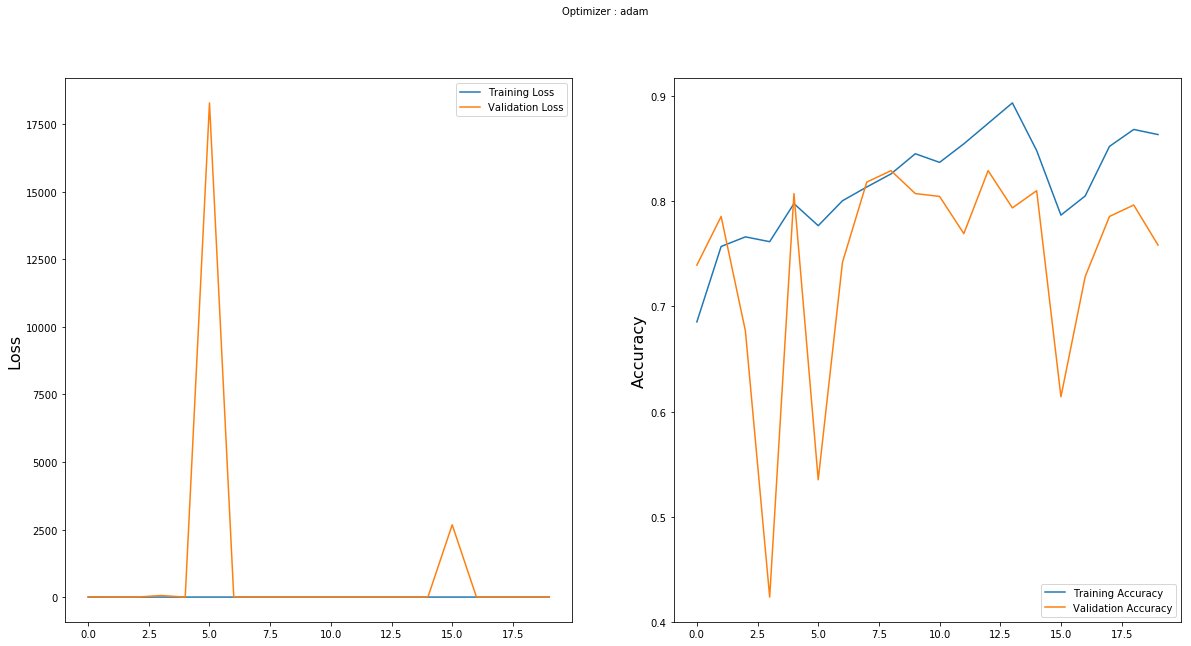

In [13]:
import matplotlib.pyplot as plt

x=r2
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# DenseNet

In [14]:
from tensorflow.keras.applications.densenet import DenseNet121
mob1 = DenseNet121(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [15]:
x1= Flatten()(mob1.output)
prediction1 = Dense(5, activation='softmax')(x1)
model121 = Model(inputs = mob1.inputs, outputs = prediction1)
model121.summary()
model121.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
_______________________________________________________________________________________

conv3_block4_1_conv (Conv2D)    (None, 28, 28, 128)  28672       conv3_block4_0_relu[0][0]        
__________________________________________________________________________________________________
conv3_block4_1_bn (BatchNormali (None, 28, 28, 128)  512         conv3_block4_1_conv[0][0]        
__________________________________________________________________________________________________
conv3_block4_1_relu (Activation (None, 28, 28, 128)  0           conv3_block4_1_bn[0][0]          
__________________________________________________________________________________________________
conv3_block4_2_conv (Conv2D)    (None, 28, 28, 32)   36864       conv3_block4_1_relu[0][0]        
__________________________________________________________________________________________________
conv3_block4_concat (Concatenat (None, 28, 28, 256)  0           conv3_block3_concat[0][0]        
                                                                 conv3_block4_2_conv[0][0]        
__________

conv4_block2_2_conv (Conv2D)    (None, 14, 14, 32)   36864       conv4_block2_1_relu[0][0]        
__________________________________________________________________________________________________
conv4_block2_concat (Concatenat (None, 14, 14, 320)  0           conv4_block1_concat[0][0]        
                                                                 conv4_block2_2_conv[0][0]        
__________________________________________________________________________________________________
conv4_block3_0_bn (BatchNormali (None, 14, 14, 320)  1280        conv4_block2_concat[0][0]        
__________________________________________________________________________________________________
conv4_block3_0_relu (Activation (None, 14, 14, 320)  0           conv4_block3_0_bn[0][0]          
__________________________________________________________________________________________________
conv4_block3_1_conv (Conv2D)    (None, 14, 14, 128)  40960       conv4_block3_0_relu[0][0]        
__________

__________________________________________________________________________________________________
conv4_block13_2_conv (Conv2D)   (None, 14, 14, 32)   36864       conv4_block13_1_relu[0][0]       
__________________________________________________________________________________________________
conv4_block13_concat (Concatena (None, 14, 14, 672)  0           conv4_block12_concat[0][0]       
                                                                 conv4_block13_2_conv[0][0]       
__________________________________________________________________________________________________
conv4_block14_0_bn (BatchNormal (None, 14, 14, 672)  2688        conv4_block13_concat[0][0]       
__________________________________________________________________________________________________
conv4_block14_0_relu (Activatio (None, 14, 14, 672)  0           conv4_block14_0_bn[0][0]         
__________________________________________________________________________________________________
conv4_bloc

conv4_block24_1_relu (Activatio (None, 14, 14, 128)  0           conv4_block24_1_bn[0][0]         
__________________________________________________________________________________________________
conv4_block24_2_conv (Conv2D)   (None, 14, 14, 32)   36864       conv4_block24_1_relu[0][0]       
__________________________________________________________________________________________________
conv4_block24_concat (Concatena (None, 14, 14, 1024) 0           conv4_block23_concat[0][0]       
                                                                 conv4_block24_2_conv[0][0]       
__________________________________________________________________________________________________
pool4_bn (BatchNormalization)   (None, 14, 14, 1024) 4096        conv4_block24_concat[0][0]       
__________________________________________________________________________________________________
pool4_relu (Activation)         (None, 14, 14, 1024) 0           pool4_bn[0][0]                   
__________

__________________________________________________________________________________________________
conv5_block11_0_bn (BatchNormal (None, 7, 7, 832)    3328        conv5_block10_concat[0][0]       
__________________________________________________________________________________________________
conv5_block11_0_relu (Activatio (None, 7, 7, 832)    0           conv5_block11_0_bn[0][0]         
__________________________________________________________________________________________________
conv5_block11_1_conv (Conv2D)   (None, 7, 7, 128)    106496      conv5_block11_0_relu[0][0]       
__________________________________________________________________________________________________
conv5_block11_1_bn (BatchNormal (None, 7, 7, 128)    512         conv5_block11_1_conv[0][0]       
__________________________________________________________________________________________________
conv5_block11_1_relu (Activatio (None, 7, 7, 128)    0           conv5_block11_1_bn[0][0]         
__________

In [16]:
r1 = model121.fit(train_set, validation_data=test_set, epochs=20)

Epoch 1/20
103/103 [==============================] - ETA: 0s - loss: 1.9085 - accuracy: 0.37 - ETA: 14:46 - loss: 6.9774 - accuracy: 0.453 - ETA: 19:31 - loss: 11.1174 - accuracy: 0.47 - ETA: 21:46 - loss: 10.0570 - accuracy: 0.52 - ETA: 22:59 - loss: 8.7412 - accuracy: 0.5688 - ETA: 23:42 - loss: 8.0852 - accuracy: 0.572 - ETA: 24:08 - loss: 7.5392 - accuracy: 0.558 - ETA: 24:23 - loss: 6.7127 - accuracy: 0.570 - ETA: 24:34 - loss: 6.4252 - accuracy: 0.572 - ETA: 24:38 - loss: 5.9699 - accuracy: 0.553 - ETA: 24:37 - loss: 5.8560 - accuracy: 0.548 - ETA: 24:33 - loss: 5.5208 - accuracy: 0.544 - ETA: 24:27 - loss: 5.2321 - accuracy: 0.550 - ETA: 24:19 - loss: 4.9668 - accuracy: 0.560 - ETA: 24:12 - loss: 4.8157 - accuracy: 0.556 - ETA: 24:01 - loss: 4.9431 - accuracy: 0.554 - ETA: 23:51 - loss: 4.7233 - accuracy: 0.558 - ETA: 23:39 - loss: 4.5349 - accuracy: 0.555 - ETA: 23:28 - loss: 4.3505 - accuracy: 0.562 - ETA: 23:15 - loss: 4.2230 - accuracy: 0.556 - ETA: 23:02 - loss: 4.1056 - a

103/103 [==============================] - ETA: 0s - loss: 7.0873 - accuracy: 0.34 - ETA: 14:50 - loss: 5.6461 - accuracy: 0.484 - ETA: 19:39 - loss: 7.1582 - accuracy: 0.468 - ETA: 21:52 - loss: 6.2199 - accuracy: 0.515 - ETA: 23:04 - loss: 5.5089 - accuracy: 0.512 - ETA: 23:47 - loss: 5.4095 - accuracy: 0.494 - ETA: 24:14 - loss: 7.4636 - accuracy: 0.486 - ETA: 24:27 - loss: 6.9300 - accuracy: 0.496 - ETA: 24:37 - loss: 6.8344 - accuracy: 0.510 - ETA: 24:40 - loss: 6.4724 - accuracy: 0.509 - ETA: 24:39 - loss: 6.6463 - accuracy: 0.488 - ETA: 24:34 - loss: 6.2576 - accuracy: 0.487 - ETA: 24:29 - loss: 5.9479 - accuracy: 0.490 - ETA: 24:22 - loss: 5.7279 - accuracy: 0.497 - ETA: 24:13 - loss: 5.5354 - accuracy: 0.510 - ETA: 24:03 - loss: 5.3381 - accuracy: 0.509 - ETA: 23:53 - loss: 5.3812 - accuracy: 0.505 - ETA: 23:41 - loss: 5.4082 - accuracy: 0.496 - ETA: 23:28 - loss: 5.2525 - accuracy: 0.496 - ETA: 23:16 - loss: 5.1031 - accuracy: 0.493 - ETA: 23:03 - loss: 5.0790 - accuracy: 0.4

103/103 [==============================] - ETA: 0s - loss: 0.7738 - accuracy: 0.71 - ETA: 14:50 - loss: 0.9854 - accuracy: 0.640 - ETA: 19:41 - loss: 1.0028 - accuracy: 0.635 - ETA: 21:59 - loss: 1.0802 - accuracy: 0.601 - ETA: 23:11 - loss: 1.0539 - accuracy: 0.606 - ETA: 23:54 - loss: 1.0839 - accuracy: 0.588 - ETA: 24:20 - loss: 1.0970 - accuracy: 0.593 - ETA: 24:35 - loss: 1.0830 - accuracy: 0.585 - ETA: 24:43 - loss: 1.0600 - accuracy: 0.604 - ETA: 24:44 - loss: 1.0770 - accuracy: 0.612 - ETA: 24:44 - loss: 1.0665 - accuracy: 0.616 - ETA: 24:39 - loss: 1.0671 - accuracy: 0.622 - ETA: 24:33 - loss: 1.0382 - accuracy: 0.632 - ETA: 24:24 - loss: 1.0239 - accuracy: 0.636 - ETA: 24:15 - loss: 1.0299 - accuracy: 0.637 - ETA: 24:04 - loss: 1.0341 - accuracy: 0.634 - ETA: 23:53 - loss: 1.0369 - accuracy: 0.630 - ETA: 23:42 - loss: 1.0372 - accuracy: 0.628 - ETA: 23:29 - loss: 1.0543 - accuracy: 0.623 - ETA: 23:16 - loss: 1.0372 - accuracy: 0.626 - ETA: 23:03 - loss: 1.0692 - accuracy: 0.6

103/103 [==============================] - ETA: 0s - loss: 1.3841 - accuracy: 0.68 - ETA: 14:51 - loss: 1.3435 - accuracy: 0.578 - ETA: 19:40 - loss: 1.5274 - accuracy: 0.583 - ETA: 21:54 - loss: 1.5757 - accuracy: 0.601 - ETA: 23:06 - loss: 1.5565 - accuracy: 0.600 - ETA: 23:52 - loss: 1.5037 - accuracy: 0.609 - ETA: 24:17 - loss: 1.4515 - accuracy: 0.625 - ETA: 24:32 - loss: 1.3860 - accuracy: 0.628 - ETA: 24:39 - loss: 1.4132 - accuracy: 0.611 - ETA: 24:40 - loss: 1.4282 - accuracy: 0.590 - ETA: 24:39 - loss: 1.4247 - accuracy: 0.585 - ETA: 24:36 - loss: 2.0102 - accuracy: 0.575 - ETA: 24:31 - loss: 1.9470 - accuracy: 0.581 - ETA: 24:23 - loss: 1.8598 - accuracy: 0.598 - ETA: 24:14 - loss: 1.8638 - accuracy: 0.597 - ETA: 24:05 - loss: 1.8160 - accuracy: 0.601 - ETA: 23:54 - loss: 1.8373 - accuracy: 0.597 - ETA: 23:42 - loss: 1.8489 - accuracy: 0.590 - ETA: 23:31 - loss: 1.8102 - accuracy: 0.592 - ETA: 23:19 - loss: 1.8082 - accuracy: 0.582 - ETA: 23:05 - loss: 1.7856 - accuracy: 0.5

103/103 [==============================] - ETA: 0s - loss: 0.7110 - accuracy: 0.81 - ETA: 14:51 - loss: 1.0139 - accuracy: 0.734 - ETA: 19:33 - loss: 0.9887 - accuracy: 0.718 - ETA: 21:50 - loss: 0.9802 - accuracy: 0.695 - ETA: 23:05 - loss: 0.9554 - accuracy: 0.718 - ETA: 23:49 - loss: 1.0129 - accuracy: 0.677 - ETA: 24:15 - loss: 1.0571 - accuracy: 0.647 - ETA: 24:31 - loss: 1.0651 - accuracy: 0.640 - ETA: 24:38 - loss: 1.0308 - accuracy: 0.642 - ETA: 24:41 - loss: 1.0099 - accuracy: 0.650 - ETA: 24:41 - loss: 0.9902 - accuracy: 0.661 - ETA: 24:36 - loss: 1.0295 - accuracy: 0.651 - ETA: 24:31 - loss: 1.0339 - accuracy: 0.649 - ETA: 24:23 - loss: 1.0227 - accuracy: 0.651 - ETA: 24:15 - loss: 1.0397 - accuracy: 0.652 - ETA: 24:06 - loss: 1.0487 - accuracy: 0.652 - ETA: 23:54 - loss: 1.0870 - accuracy: 0.634 - ETA: 23:37 - loss: 1.0863 - accuracy: 0.632 - ETA: 23:25 - loss: 1.0799 - accuracy: 0.637 - ETA: 23:13 - loss: 1.0795 - accuracy: 0.642 - ETA: 23:00 - loss: 1.0856 - accuracy: 0.6

103/103 [==============================] - ETA: 0s - loss: 0.7495 - accuracy: 0.71 - ETA: 15:00 - loss: 0.6835 - accuracy: 0.718 - ETA: 19:45 - loss: 0.7067 - accuracy: 0.708 - ETA: 21:59 - loss: 0.7094 - accuracy: 0.710 - ETA: 23:14 - loss: 0.6836 - accuracy: 0.737 - ETA: 23:56 - loss: 0.7020 - accuracy: 0.739 - ETA: 24:20 - loss: 0.6745 - accuracy: 0.754 - ETA: 24:35 - loss: 0.6565 - accuracy: 0.769 - ETA: 24:44 - loss: 0.7033 - accuracy: 0.756 - ETA: 24:46 - loss: 0.7439 - accuracy: 0.740 - ETA: 24:45 - loss: 0.7266 - accuracy: 0.741 - ETA: 24:45 - loss: 0.7244 - accuracy: 0.744 - ETA: 24:38 - loss: 0.7471 - accuracy: 0.740 - ETA: 24:30 - loss: 0.7487 - accuracy: 0.738 - ETA: 24:21 - loss: 0.7636 - accuracy: 0.739 - ETA: 24:11 - loss: 0.7664 - accuracy: 0.736 - ETA: 24:00 - loss: 0.7714 - accuracy: 0.735 - ETA: 23:48 - loss: 0.7758 - accuracy: 0.734 - ETA: 23:34 - loss: 0.7788 - accuracy: 0.731 - ETA: 23:21 - loss: 0.7841 - accuracy: 0.728 - ETA: 23:08 - loss: 0.7763 - accuracy: 0.7

103/103 [==============================] - ETA: 0s - loss: 0.8357 - accuracy: 0.65 - ETA: 14:51 - loss: 0.8010 - accuracy: 0.703 - ETA: 19:39 - loss: 0.7878 - accuracy: 0.687 - ETA: 21:52 - loss: 0.7535 - accuracy: 0.695 - ETA: 23:05 - loss: 0.7155 - accuracy: 0.700 - ETA: 23:49 - loss: 0.7390 - accuracy: 0.697 - ETA: 24:18 - loss: 0.8055 - accuracy: 0.683 - ETA: 24:37 - loss: 0.7619 - accuracy: 0.699 - ETA: 24:44 - loss: 0.7391 - accuracy: 0.715 - ETA: 24:49 - loss: 0.7323 - accuracy: 0.715 - ETA: 24:48 - loss: 0.7514 - accuracy: 0.704 - ETA: 24:43 - loss: 0.7513 - accuracy: 0.705 - ETA: 24:37 - loss: 0.7768 - accuracy: 0.697 - ETA: 24:28 - loss: 0.7938 - accuracy: 0.689 - ETA: 24:19 - loss: 0.7793 - accuracy: 0.695 - ETA: 24:10 - loss: 0.7815 - accuracy: 0.693 - ETA: 23:58 - loss: 0.7897 - accuracy: 0.698 - ETA: 23:46 - loss: 0.7847 - accuracy: 0.701 - ETA: 23:33 - loss: 0.7790 - accuracy: 0.707 - ETA: 23:20 - loss: 0.7862 - accuracy: 0.701 - ETA: 23:07 - loss: 0.7802 - accuracy: 0.7

103/103 [==============================] - ETA: 0s - loss: 0.9746 - accuracy: 0.68 - ETA: 14:48 - loss: 0.8462 - accuracy: 0.687 - ETA: 19:46 - loss: 0.7246 - accuracy: 0.718 - ETA: 22:05 - loss: 0.7678 - accuracy: 0.718 - ETA: 23:19 - loss: 0.7128 - accuracy: 0.737 - ETA: 24:01 - loss: 0.7256 - accuracy: 0.729 - ETA: 24:26 - loss: 0.7088 - accuracy: 0.723 - ETA: 24:38 - loss: 0.7501 - accuracy: 0.707 - ETA: 24:46 - loss: 0.7556 - accuracy: 0.708 - ETA: 24:48 - loss: 0.7423 - accuracy: 0.712 - ETA: 24:48 - loss: 0.7615 - accuracy: 0.707 - ETA: 24:44 - loss: 0.7902 - accuracy: 0.700 - ETA: 24:36 - loss: 0.7786 - accuracy: 0.709 - ETA: 24:28 - loss: 0.7918 - accuracy: 0.700 - ETA: 24:20 - loss: 0.7789 - accuracy: 0.708 - ETA: 24:11 - loss: 0.7792 - accuracy: 0.710 - ETA: 23:59 - loss: 0.8042 - accuracy: 0.704 - ETA: 23:42 - loss: 0.8081 - accuracy: 0.703 - ETA: 23:30 - loss: 0.7999 - accuracy: 0.709 - ETA: 23:17 - loss: 0.7946 - accuracy: 0.713 - ETA: 23:04 - loss: 0.7827 - accuracy: 0.7

103/103 [==============================] - ETA: 0s - loss: 0.5803 - accuracy: 0.71 - ETA: 14:51 - loss: 0.6859 - accuracy: 0.671 - ETA: 19:33 - loss: 0.6840 - accuracy: 0.718 - ETA: 21:45 - loss: 0.6952 - accuracy: 0.726 - ETA: 22:59 - loss: 0.7096 - accuracy: 0.712 - ETA: 23:42 - loss: 0.6676 - accuracy: 0.739 - ETA: 24:08 - loss: 0.7589 - accuracy: 0.723 - ETA: 24:24 - loss: 0.8292 - accuracy: 0.691 - ETA: 24:33 - loss: 0.8481 - accuracy: 0.687 - ETA: 24:37 - loss: 0.8574 - accuracy: 0.684 - ETA: 24:37 - loss: 0.8610 - accuracy: 0.690 - ETA: 24:35 - loss: 0.8584 - accuracy: 0.687 - ETA: 24:29 - loss: 0.8366 - accuracy: 0.697 - ETA: 24:21 - loss: 0.8341 - accuracy: 0.694 - ETA: 24:13 - loss: 0.8298 - accuracy: 0.695 - ETA: 24:04 - loss: 0.8255 - accuracy: 0.701 - ETA: 23:53 - loss: 0.8245 - accuracy: 0.702 - ETA: 23:41 - loss: 0.8273 - accuracy: 0.706 - ETA: 23:29 - loss: 0.8452 - accuracy: 0.699 - ETA: 23:16 - loss: 0.8254 - accuracy: 0.701 - ETA: 23:03 - loss: 0.8234 - accuracy: 0.6

103/103 [==============================] - ETA: 0s - loss: 0.5364 - accuracy: 0.84 - ETA: 14:53 - loss: 0.7129 - accuracy: 0.796 - ETA: 19:41 - loss: 0.9522 - accuracy: 0.750 - ETA: 21:55 - loss: 0.9651 - accuracy: 0.726 - ETA: 23:21 - loss: 0.9872 - accuracy: 0.712 - ETA: 24:02 - loss: 1.0179 - accuracy: 0.708 - ETA: 24:28 - loss: 0.9728 - accuracy: 0.718 - ETA: 24:41 - loss: 1.1331 - accuracy: 0.703 - ETA: 24:48 - loss: 1.1093 - accuracy: 0.697 - ETA: 24:50 - loss: 1.0830 - accuracy: 0.696 - ETA: 24:48 - loss: 1.0411 - accuracy: 0.693 - ETA: 24:44 - loss: 0.9989 - accuracy: 0.700 - ETA: 24:38 - loss: 0.9889 - accuracy: 0.704 - ETA: 24:30 - loss: 0.9791 - accuracy: 0.709 - ETA: 24:20 - loss: 0.9852 - accuracy: 0.708 - ETA: 24:08 - loss: 0.9904 - accuracy: 0.714 - ETA: 23:58 - loss: 0.9926 - accuracy: 0.720 - ETA: 23:46 - loss: 1.1216 - accuracy: 0.717 - ETA: 23:33 - loss: 1.1382 - accuracy: 0.705 - ETA: 23:20 - loss: 1.1690 - accuracy: 0.698 - ETA: 23:07 - loss: 1.2051 - accuracy: 0.6

In [17]:
model121.save('model4.h5')

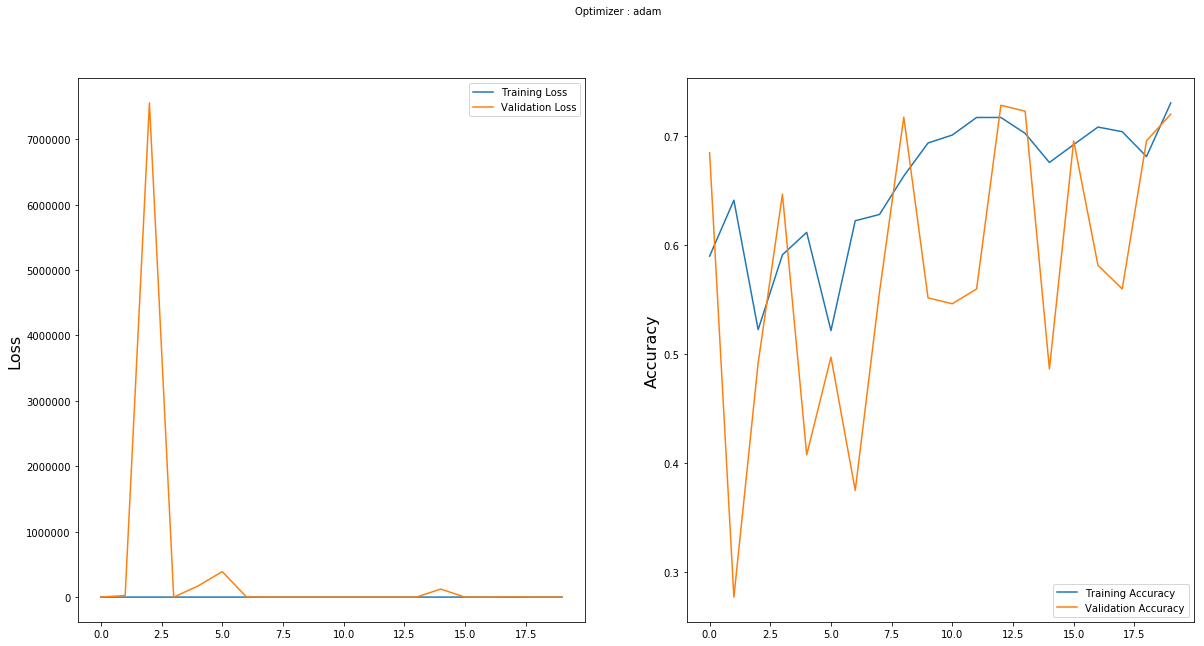

In [18]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Resnet 50

In [19]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [20]:
resnet = ResNet50(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [21]:
x = Flatten()(resnet.output)

In [22]:
prediction = Dense(5, activation='softmax')(x)

In [23]:
model123 = Model(inputs = resnet.inputs, outputs = prediction)
model123.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

__________________________________________________________________________________________________
conv3_block4_3_bn (BatchNormali (None, 28, 28, 512)  2048        conv3_block4_3_conv[0][0]        
__________________________________________________________________________________________________
conv3_block4_add (Add)          (None, 28, 28, 512)  0           conv3_block3_out[0][0]           
                                                                 conv3_block4_3_bn[0][0]          
__________________________________________________________________________________________________
conv3_block4_out (Activation)   (None, 28, 28, 512)  0           conv3_block4_add[0][0]           
__________________________________________________________________________________________________
conv4_block1_1_conv (Conv2D)    (None, 14, 14, 256)  131328      conv3_block4_out[0][0]           
__________________________________________________________________________________________________
conv4_bloc

__________________________________________________________________________________________________
conv5_block2_1_bn (BatchNormali (None, 7, 7, 512)    2048        conv5_block2_1_conv[0][0]        
__________________________________________________________________________________________________
conv5_block2_1_relu (Activation (None, 7, 7, 512)    0           conv5_block2_1_bn[0][0]          
__________________________________________________________________________________________________
conv5_block2_2_conv (Conv2D)    (None, 7, 7, 512)    2359808     conv5_block2_1_relu[0][0]        
__________________________________________________________________________________________________
conv5_block2_2_bn (BatchNormali (None, 7, 7, 512)    2048        conv5_block2_2_conv[0][0]        
__________________________________________________________________________________________________
conv5_block2_2_relu (Activation (None, 7, 7, 512)    0           conv5_block2_2_bn[0][0]          
__________

In [24]:
model123.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
hist = model123.fit_generator(train_set, validation_data=test_set, epochs=20, callbacks=[callback])

Epoch 1/20
103/103 [==============================] - ETA: 0s - loss: 2.5294 - accuracy: 0.25 - ETA: 11:21 - loss: 11.1138 - accuracy: 0.39 - ETA: 15:00 - loss: 11.0776 - accuracy: 0.47 - ETA: 16:44 - loss: 10.9318 - accuracy: 0.45 - ETA: 17:40 - loss: 9.0603 - accuracy: 0.4812 - ETA: 18:17 - loss: 7.8769 - accuracy: 0.484 - ETA: 18:38 - loss: 7.2738 - accuracy: 0.500 - ETA: 18:50 - loss: 6.5510 - accuracy: 0.503 - ETA: 18:56 - loss: 5.9075 - accuracy: 0.531 - ETA: 18:58 - loss: 5.4101 - accuracy: 0.543 - ETA: 18:57 - loss: 5.3556 - accuracy: 0.556 - ETA: 18:54 - loss: 5.8034 - accuracy: 0.557 - ETA: 18:49 - loss: 5.5368 - accuracy: 0.560 - ETA: 18:43 - loss: 5.9331 - accuracy: 0.562 - ETA: 18:37 - loss: 5.6263 - accuracy: 0.568 - ETA: 18:29 - loss: 5.4443 - accuracy: 0.558 - ETA: 18:21 - loss: 5.1753 - accuracy: 0.568 - ETA: 18:12 - loss: 4.9449 - accuracy: 0.569 - ETA: 18:03 - loss: 4.7312 - accuracy: 0.574 - ETA: 17:54 - loss: 4.5566 - accuracy: 0.579 - ETA: 17:44 - loss: 4.3781 - a

103/103 [==============================] - ETA: 0s - loss: 4.8568 - accuracy: 0.75 - ETA: 11:51 - loss: 2.7695 - accuracy: 0.765 - ETA: 15:38 - loss: 2.8798 - accuracy: 0.760 - ETA: 17:27 - loss: 4.6212 - accuracy: 0.734 - ETA: 18:18 - loss: 4.6701 - accuracy: 0.718 - ETA: 18:45 - loss: 4.0664 - accuracy: 0.708 - ETA: 19:02 - loss: 3.6587 - accuracy: 0.696 - ETA: 19:12 - loss: 3.3015 - accuracy: 0.695 - ETA: 19:15 - loss: 3.0596 - accuracy: 0.680 - ETA: 19:15 - loss: 2.8420 - accuracy: 0.684 - ETA: 19:12 - loss: 2.6740 - accuracy: 0.687 - ETA: 19:07 - loss: 5.3477 - accuracy: 0.677 - ETA: 19:01 - loss: 5.0186 - accuracy: 0.673 - ETA: 18:54 - loss: 4.7217 - accuracy: 0.678 - ETA: 18:46 - loss: 4.4954 - accuracy: 0.685 - ETA: 18:38 - loss: 4.2812 - accuracy: 0.681 - ETA: 18:29 - loss: 4.0798 - accuracy: 0.685 - ETA: 18:20 - loss: 3.9005 - accuracy: 0.691 - ETA: 18:10 - loss: 4.2748 - accuracy: 0.697 - ETA: 17:59 - loss: 4.3817 - accuracy: 0.701 - ETA: 17:49 - loss: 4.2113 - accuracy: 0.7

103/103 [==============================] - ETA: 0s - loss: 0.8710 - accuracy: 0.71 - ETA: 11:27 - loss: 0.7891 - accuracy: 0.718 - ETA: 15:07 - loss: 0.8162 - accuracy: 0.697 - ETA: 16:52 - loss: 0.7943 - accuracy: 0.703 - ETA: 17:47 - loss: 0.8181 - accuracy: 0.687 - ETA: 18:19 - loss: 0.8275 - accuracy: 0.692 - ETA: 18:38 - loss: 0.8571 - accuracy: 0.700 - ETA: 18:51 - loss: 1.5435 - accuracy: 0.683 - ETA: 18:57 - loss: 1.4487 - accuracy: 0.691 - ETA: 18:59 - loss: 1.4055 - accuracy: 0.690 - ETA: 18:59 - loss: 1.3591 - accuracy: 0.684 - ETA: 18:59 - loss: 1.3525 - accuracy: 0.671 - ETA: 18:55 - loss: 1.3228 - accuracy: 0.675 - ETA: 18:48 - loss: 1.2859 - accuracy: 0.678 - ETA: 18:41 - loss: 1.2491 - accuracy: 0.683 - ETA: 18:34 - loss: 1.2095 - accuracy: 0.693 - ETA: 18:25 - loss: 1.1867 - accuracy: 0.693 - ETA: 18:15 - loss: 1.1756 - accuracy: 0.691 - ETA: 18:05 - loss: 1.1618 - accuracy: 0.692 - ETA: 17:55 - loss: 1.1655 - accuracy: 0.684 - ETA: 17:45 - loss: 1.1442 - accuracy: 0.6

103/103 [==============================] - ETA: 0s - loss: 0.9282 - accuracy: 0.68 - ETA: 11:31 - loss: 0.7790 - accuracy: 0.734 - ETA: 15:24 - loss: 0.7875 - accuracy: 0.718 - ETA: 17:04 - loss: 0.8857 - accuracy: 0.687 - ETA: 17:56 - loss: 0.8688 - accuracy: 0.693 - ETA: 18:28 - loss: 0.8148 - accuracy: 0.724 - ETA: 18:47 - loss: 0.8531 - accuracy: 0.714 - ETA: 18:57 - loss: 0.8701 - accuracy: 0.710 - ETA: 19:03 - loss: 0.8939 - accuracy: 0.701 - ETA: 19:04 - loss: 0.8879 - accuracy: 0.703 - ETA: 19:03 - loss: 0.8678 - accuracy: 0.707 - ETA: 18:59 - loss: 0.8909 - accuracy: 0.697 - ETA: 18:54 - loss: 0.8953 - accuracy: 0.692 - ETA: 18:48 - loss: 0.9077 - accuracy: 0.680 - ETA: 18:42 - loss: 0.9044 - accuracy: 0.679 - ETA: 18:33 - loss: 0.8993 - accuracy: 0.679 - ETA: 18:25 - loss: 0.8971 - accuracy: 0.680 - ETA: 18:16 - loss: 0.8947 - accuracy: 0.682 - ETA: 18:06 - loss: 0.8879 - accuracy: 0.684 - ETA: 17:56 - loss: 0.8875 - accuracy: 0.687 - ETA: 17:46 - loss: 0.8706 - accuracy: 0.6

103/103 [==============================] - ETA: 0s - loss: 0.7998 - accuracy: 0.68 - ETA: 11:25 - loss: 0.6693 - accuracy: 0.750 - ETA: 15:05 - loss: 0.6896 - accuracy: 0.760 - ETA: 16:52 - loss: 0.6742 - accuracy: 0.757 - ETA: 17:48 - loss: 0.7469 - accuracy: 0.737 - ETA: 18:19 - loss: 0.7374 - accuracy: 0.739 - ETA: 18:40 - loss: 0.7194 - accuracy: 0.741 - ETA: 18:51 - loss: 0.7035 - accuracy: 0.750 - ETA: 18:56 - loss: 0.6858 - accuracy: 0.753 - ETA: 18:58 - loss: 0.7357 - accuracy: 0.734 - ETA: 18:57 - loss: 0.7514 - accuracy: 0.727 - ETA: 18:55 - loss: 0.7946 - accuracy: 0.721 - ETA: 18:51 - loss: 0.7832 - accuracy: 0.730 - ETA: 18:45 - loss: 0.7798 - accuracy: 0.729 - ETA: 18:39 - loss: 0.7773 - accuracy: 0.731 - ETA: 18:31 - loss: 0.7918 - accuracy: 0.722 - ETA: 18:23 - loss: 0.7891 - accuracy: 0.722 - ETA: 18:14 - loss: 0.7717 - accuracy: 0.730 - ETA: 18:04 - loss: 0.7739 - accuracy: 0.727 - ETA: 17:54 - loss: 0.7815 - accuracy: 0.723 - ETA: 17:44 - loss: 0.7762 - accuracy: 0.7

103/103 [==============================] - ETA: 0s - loss: 0.7367 - accuracy: 0.68 - ETA: 11:28 - loss: 0.8023 - accuracy: 0.718 - ETA: 15:07 - loss: 0.8447 - accuracy: 0.697 - ETA: 16:50 - loss: 0.7751 - accuracy: 0.726 - ETA: 17:46 - loss: 0.7331 - accuracy: 0.743 - ETA: 18:22 - loss: 0.7318 - accuracy: 0.750 - ETA: 18:42 - loss: 0.7082 - accuracy: 0.758 - ETA: 18:52 - loss: 0.7166 - accuracy: 0.750 - ETA: 18:58 - loss: 0.7013 - accuracy: 0.760 - ETA: 18:59 - loss: 0.7324 - accuracy: 0.750 - ETA: 18:58 - loss: 0.7185 - accuracy: 0.758 - ETA: 18:55 - loss: 0.7031 - accuracy: 0.763 - ETA: 18:50 - loss: 0.7220 - accuracy: 0.750 - ETA: 18:45 - loss: 0.7288 - accuracy: 0.745 - ETA: 18:38 - loss: 0.7494 - accuracy: 0.739 - ETA: 18:31 - loss: 0.7625 - accuracy: 0.732 - ETA: 18:22 - loss: 0.7720 - accuracy: 0.724 - ETA: 18:09 - loss: 0.7767 - accuracy: 0.726 - ETA: 18:00 - loss: 0.7891 - accuracy: 0.719 - ETA: 17:50 - loss: 0.8016 - accuracy: 0.716 - ETA: 17:39 - loss: 0.8050 - accuracy: 0.7

In [26]:
model123.save('model5.h5')

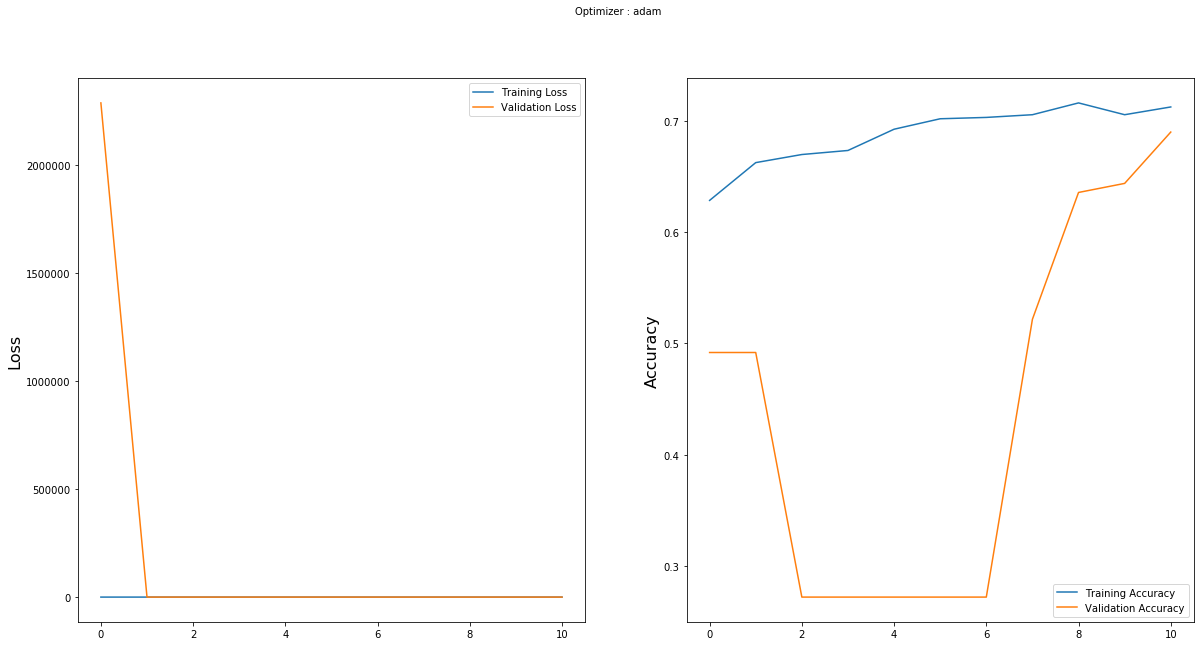

In [27]:
import matplotlib.pyplot as plt

x=hist
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# ResNet 18

In [7]:
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Conv2D,  MaxPool2D, Flatten, GlobalAveragePooling2D,  BatchNormalization, Layer, Add
from keras.models import Sequential
from keras.models import Model
import tensorflow as tf


class ResnetBlock(Model):
    """
    A standard resnet block.
    """

    def __init__(self, channels: int, down_sample=False):
        """
        channels: same as number of convolution kernels
        """
        super().__init__()

        self.__channels = channels
        self.__down_sample = down_sample
        self.__strides = [2, 1] if down_sample else [1, 1]

        KERNEL_SIZE = (3, 3)
        # use He initialization, instead of Xavier (a.k.a 'glorot_uniform' in Keras), as suggested in [2]
        INIT_SCHEME = "he_normal"

        self.conv_1 = Conv2D(self.__channels, strides=self.__strides[0],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_1 = BatchNormalization()
        self.conv_2 = Conv2D(self.__channels, strides=self.__strides[1],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_2 = BatchNormalization()
        self.merge = Add()

        if self.__down_sample:
            # perform down sampling using stride of 2, according to [1].
            self.res_conv = Conv2D(
                self.__channels, strides=2, kernel_size=(1, 1), kernel_initializer=INIT_SCHEME, padding="same")
            self.res_bn = BatchNormalization()

    def call(self, inputs):
        res = inputs

        x = self.conv_1(inputs)
        x = self.bn_1(x)
        x = tf.nn.relu(x)
        x = self.conv_2(x)
        x = self.bn_2(x)

        if self.__down_sample:
            res = self.res_conv(res)
            res = self.res_bn(res)

        # if not perform down sample, then add a shortcut directly
        x = self.merge([x, res])
        out = tf.nn.relu(x)
        return out

Using TensorFlow backend.


In [8]:

class ResNet18(Model):

    def __init__(self, num_classes, **kwargs):
        """
            num_classes: number of classes in specific classification task.
        """
        super().__init__(**kwargs)
        self.conv_1 = Conv2D(64, (7, 7), strides=2,
                             padding="same", kernel_initializer="he_normal")
        self.init_bn = BatchNormalization()
        self.pool_2 = MaxPool2D(pool_size=(2, 2), strides=2, padding="same")
        self.res_1_1 = ResnetBlock(64)
        self.res_1_2 = ResnetBlock(64)
        self.res_2_1 = ResnetBlock(128, down_sample=True)
        self.res_2_2 = ResnetBlock(128)
        self.res_3_1 = ResnetBlock(256, down_sample=True)
        self.res_3_2 = ResnetBlock(256)
        self.res_4_1 = ResnetBlock(512, down_sample=True)
        self.res_4_2 = ResnetBlock(512)
        self.avg_pool = GlobalAveragePooling2D()
        self.flat = Flatten()
        self.fc = Dense(num_classes, activation="softmax")

    def call(self, inputs):
        out = self.conv_1(inputs)
        out = self.init_bn(out)
        out = tf.nn.relu(out)
        out = self.pool_2(out)
        for res_block in [self.res_1_1, self.res_1_2, self.res_2_1, self.res_2_2, self.res_3_1, self.res_3_2, self.res_4_1, self.res_4_2]:
            out = res_block(out)
        out = self.avg_pool(out)
        out = self.flat(out)
        out = self.fc(out)
        return out

In [9]:
model = ResNet18(5)
model.build(input_shape = (None,224,224,3))
#use categorical_crossentropy since the label is one-hot encoded
from keras.optimizers import SGD
# opt = SGD(learning_rate=0.1,momentum=0.9,decay = 1e-04) #parameters suggested by He [1]
model.compile(optimizer = "adam",loss='categorical_crossentropy', metrics=["accuracy"]) 
model.summary()

Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model: "res_net18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  9472      
_________________________________________________________________
batch_normalization (BatchNo multiple                  256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
resnet_block (ResnetBlock)   multiple                  74368     
_________________________________________________________________
resnet_block_1 (ResnetBlock) multiple          

In [11]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(patience= 8, restore_best_weights=True, monitor="val_acc")
#I did not use cross validation, so the validate performance is not accurate.
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
hist = model.fit_generator(train_set, validation_data=test_set, epochs=2, callbacks=[callback])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/2
103/103 [==============================] - ETA: 0s - loss: 2.0622 - accuracy: 0.09 - ETA: 3:31 - loss: 2.7739 - accuracy: 0.18 - ETA: 4:32 - loss: 3.4568 - accuracy: 0.20 - ETA: 5:03 - loss: 3.7741 - accuracy: 0.22 - ETA: 5:21 - loss: 3.4123 - accuracy: 0.28 - ETA: 5:31 - loss: 3.0262 - accuracy: 0.33 - ETA: 5:39 - loss: 2.7471 - accuracy: 0.36 - ETA: 5:44 - loss: 2.5892 - accuracy: 0.37 - ETA: 5:50 - loss: 2.4801 - accuracy: 0.38 - ETA: 5:52 - loss: 2.3721 - accuracy: 0.39 - ETA: 5:51 - loss: 2.2398 - accuracy: 0.41 - ETA: 5:51 - loss: 2.1820 - accuracy: 0.41 - ETA: 5:53 - loss: 2.1013 - accuracy: 0.43 - ETA: 5:49 - loss: 2.0383 - accuracy: 0.43 - ETA: 5:46 - loss: 1.9682 - accuracy: 0.45 - ETA: 5:44 - loss: 1.9389 - accuracy: 0.46 - ETA: 5:41 - loss: 1.8737 - accuracy: 0.47 - ETA: 5:38 - loss: 1.8180 - accuracy: 0.48 - ETA: 5:36 - loss: 1.7703 - accuracy: 0.50 - ETA: 5:32 - loss: 1.7409 - accuracy: 

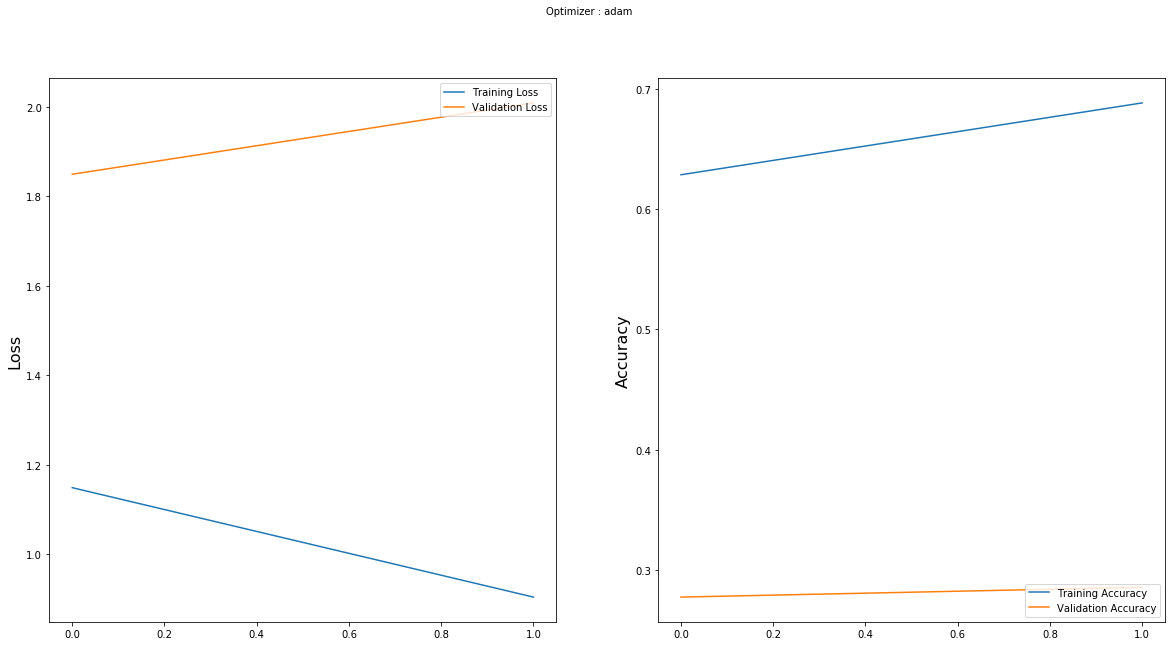

In [13]:
import matplotlib.pyplot as plt

x=hist
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# AlexNet

In [18]:
import tensorflow as tf
from tensorflow import keras

In [35]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5, activation='softmax')
])

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_90 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
batch_normalization_30 (Batc (None, 54, 54, 96)        384       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 26, 26, 256)       614656    
_________________________________________________________________
batch_normalization_31 (Batc (None, 26, 26, 256)       1024      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 12, 12, 384)      

In [37]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(patience= 8, restore_best_weights=True, monitor="val_acc")
#I did not use cross validation, so the validate performance is not accurate.
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
hist = model.fit_generator(train_set, validation_data=test_set, epochs=2, callbacks=[callback])

Epoch 1/2
103/103 [==============================] - ETA: 0s - loss: 3.7181 - accuracy: 0.18 - ETA: 1:24 - loss: 32.3230 - accuracy: 0.328 - ETA: 1:51 - loss: 56.9272 - accuracy: 0.291 - ETA: 2:04 - loss: 49.7390 - accuracy: 0.257 - ETA: 2:13 - loss: 41.7521 - accuracy: 0.312 - ETA: 2:17 - loss: 36.6014 - accuracy: 0.343 - ETA: 2:20 - loss: 32.8324 - accuracy: 0.375 - ETA: 2:22 - loss: 29.6979 - accuracy: 0.371 - ETA: 2:22 - loss: 27.3431 - accuracy: 0.368 - ETA: 2:23 - loss: 24.9209 - accuracy: 0.387 - ETA: 2:24 - loss: 23.0630 - accuracy: 0.392 - ETA: 2:23 - loss: 21.6292 - accuracy: 0.398 - ETA: 2:23 - loss: 20.3428 - accuracy: 0.413 - ETA: 2:22 - loss: 19.1609 - accuracy: 0.415 - ETA: 2:22 - loss: 18.1032 - accuracy: 0.418 - ETA: 2:21 - loss: 17.1843 - accuracy: 0.425 - ETA: 2:20 - loss: 16.3711 - accuracy: 0.433 - ETA: 2:19 - loss: 15.8151 - accuracy: 0.430 - ETA: 2:18 - loss: 15.1542 - accuracy: 0.435 - ETA: 2:17 - loss: 14.6150 - accuracy: 0.437 - ETA: 2:16 - loss: 14.0222 - acc

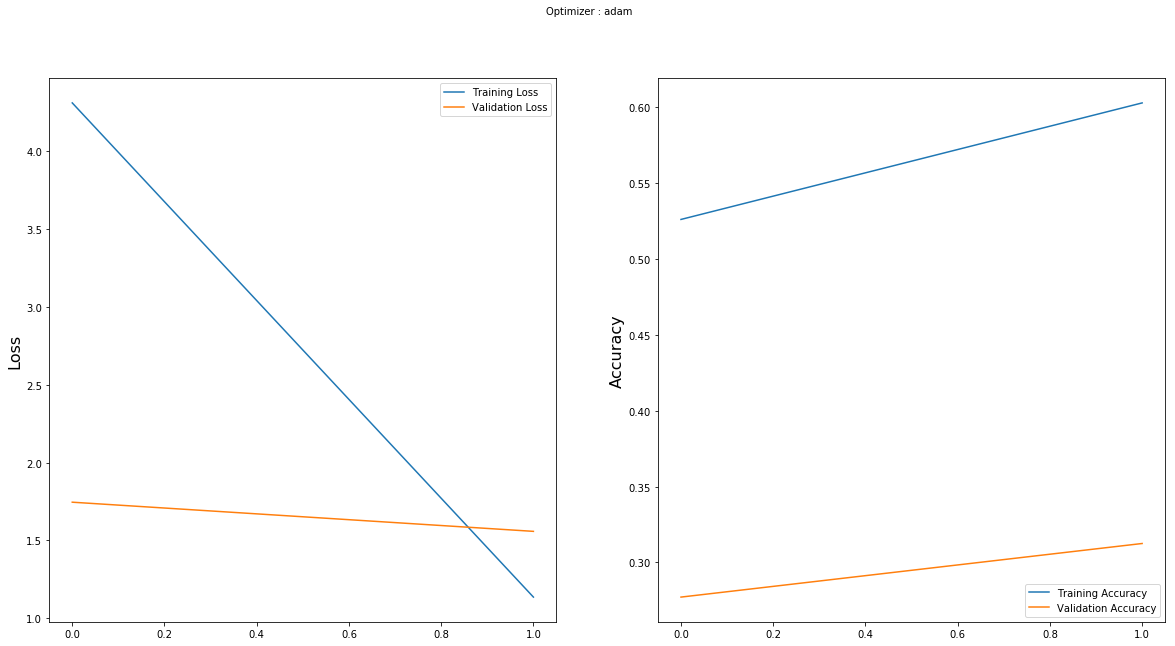

In [26]:
import matplotlib.pyplot as plt

x=hist
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()